# Tutorial: Implementing Layer-Wise Relevance Propagation for MNIST using JAX

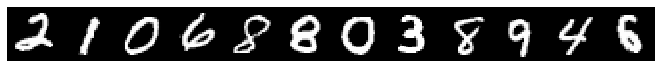

In [1]:
import utils
# X has dimensions (12, 784), 12 digits, each with 784 (28*28) pixel values
# T has dimensions (12,), each row/element corresponds to the ground-truth label (0-9) of the digit in X
X,T = utils.loaddata()
%matplotlib inline
utils.digit(X.reshape(1,12,28,28).transpose(0,2,1,3).reshape(28,12*28),9,0.75)

In [2]:
# Load network weights and biases
#
# Weights vector has dimensions ((784, 300), (300, 100), (100, 10)), which corresponds to a
# fully connected network with 784 input nodes, 300 and 100 hidden nodes, and 10 output nodes.
#
# Biases vector has dimensions ((300,), (100,), (10,))
W,B = utils.loadparams()
# Length of weights vector is 3
L = len(W)

In [3]:
import jax.numpy as jnp

# All activations for all layers in one matrix
# Twelve times, one for each image of a digit
#
# A has dimensions ((12, 784), (12, 300), (12, 100), (12, 10))
A = [X]+[None]*L
for l in range(L):
    # maximum(0, A) corresponds to the ReLU activation function
    A[l+1] = jnp.maximum(0,A[l].dot(W[l])+B[l])